In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
from data_analysis_codes.tools import NumMethods
import h5py
from data_analysis_codes.tools import Plot2d
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import FD as FD_file
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file

In [7]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N128_EdS_GRH_Puncture')
fdata = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
fc = pd.read_table(param['datapath']+'constraints.csv', delimiter=',')
Lin = LinData.LinData_Class(param)
plot = Plot2d.MyPlot2dclass(param, Lin)

 read time file


In [24]:
def get_1ddata(f, name, key, it):
    fkey = name + '::{} it={} tl=0'.format(key, it)
    fkey = fkey + ' rl={}'.format(param['max_refinement_levels'] - 1)
    data = RRead.fixij(f[fkey])
    data = RRead.cut0(data, param['ghost_size'], param['Nx'])
    return data
    
def formatp():
    plt.gca().set_aspect("equal")
    plt.colorbar(format='%.1e', extend='both', ticks = ticker.MaxNLocator(nbins = 9))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

def plotbeta(it):
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath']+param['simname'], it), 'r')
    betax = get_1ddata(f, 'ADMBASE', 'betax', it)
    betay = get_1ddata(f, 'ADMBASE', 'betay', it)
    betaz = get_1ddata(f, 'ADMBASE', 'betaz', it)
    
    coorcoor = Lin.d1x/param['Lx']
    
    i = int(param['Nx']/4) - 2
    plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.pcolormesh(coorcoor, coorcoor, betax[:, :, i].T, shading='gouraud')
    plt.title(r'$\beta_x$, iz=N/4 - 2'+', t=%.2f'%Lin.temp_from_temp('t', 'it', it))
    formatp()
    plt.subplot(132)
    plt.pcolormesh(coorcoor, coorcoor, betay[:, :, i].T, shading='gouraud')
    plt.title(r'$\beta_y$')
    formatp()
    plt.subplot(133)
    plt.pcolormesh(coorcoor, coorcoor, betaz[:, :, i].T, shading='gouraud')
    plt.title(r'$\beta_z$')
    formatp()
    plt.subplots_adjust(wspace=0.5)
    
    i = int(param['Nx']/4)
    plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.pcolormesh(coorcoor, coorcoor, betax[:, :, i].T, shading='gouraud')
    plt.title(r'iz=N/4')
    formatp()
    plt.subplot(132)
    plt.pcolormesh(coorcoor, coorcoor, betay[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplot(133)
    plt.pcolormesh(coorcoor, coorcoor, betaz[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplots_adjust(wspace=0.5)
    
    i = int(param['Nx']/2)
    plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.pcolormesh(coorcoor, coorcoor, betax[:, :, i].T, shading='gouraud')
    plt.title(r'iz=N/2')
    formatp()
    plt.subplot(132)
    plt.pcolormesh(coorcoor, coorcoor, betay[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplot(133)
    plt.pcolormesh(coorcoor, coorcoor, betaz[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplots_adjust(wspace=0.5)
    
    i = int(3*param['Nx']/4)
    plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.pcolormesh(coorcoor, coorcoor, betax[:, :, i].T, shading='gouraud')
    plt.title(r'iz=3*N/4')
    formatp()
    plt.subplot(132)
    plt.pcolormesh(coorcoor, coorcoor, betay[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplot(133)
    plt.pcolormesh(coorcoor, coorcoor, betaz[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplots_adjust(wspace=0.5)
    
    i = int(3*param['Nx']/4)+2
    plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.pcolormesh(coorcoor, coorcoor, betax[:, :, i].T, shading='gouraud')
    plt.title(r'iz=3*N/4+2')
    formatp()
    plt.subplot(132)
    plt.pcolormesh(coorcoor, coorcoor, betay[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplot(133)
    plt.pcolormesh(coorcoor, coorcoor, betaz[:, :, i].T, shading='gouraud')
    formatp()
    plt.subplots_adjust(wspace=0.5)

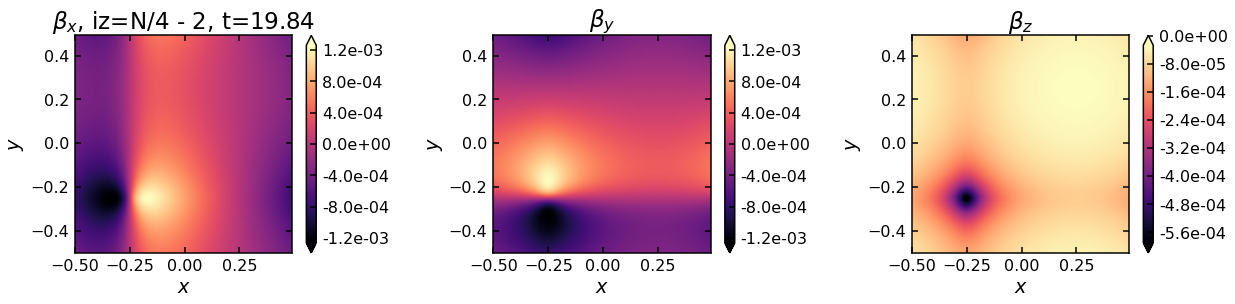

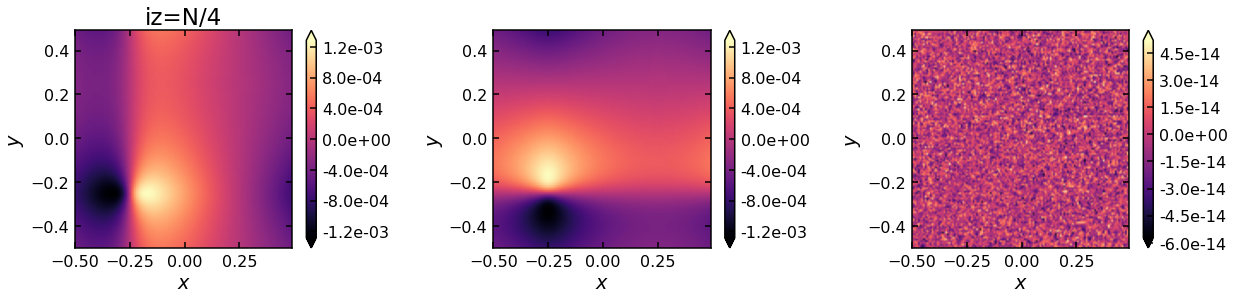

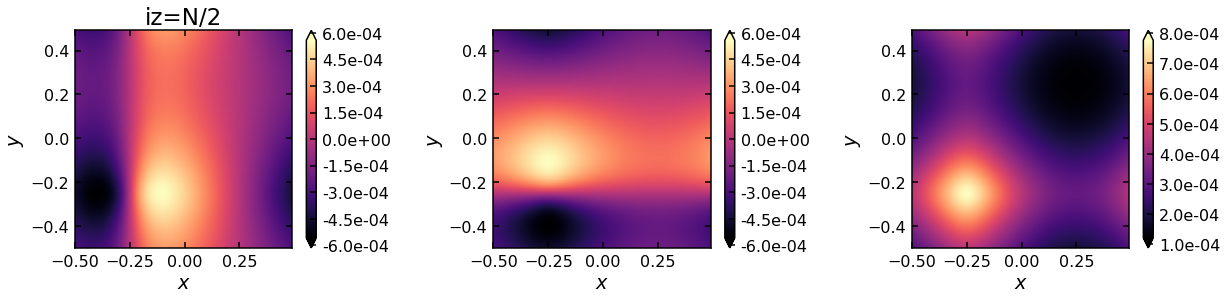

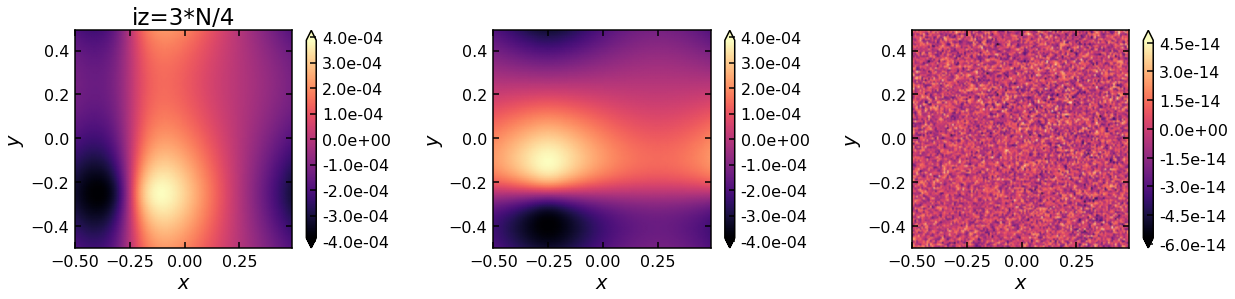

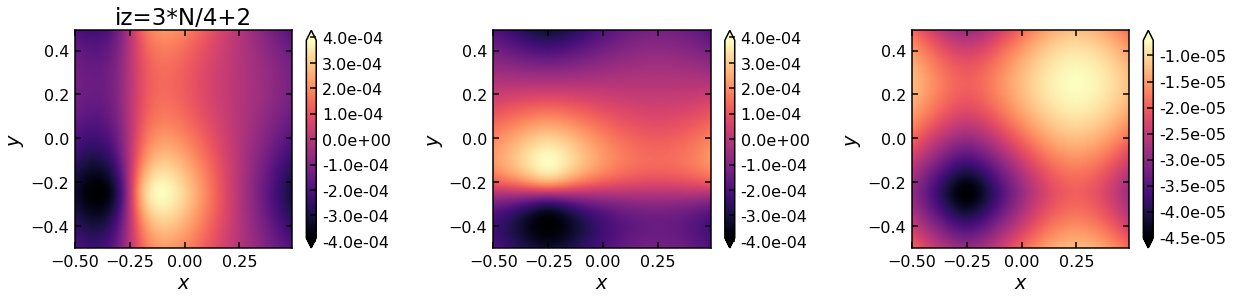

In [25]:
plotbeta(20000)

Text(0.5, 0, 't')

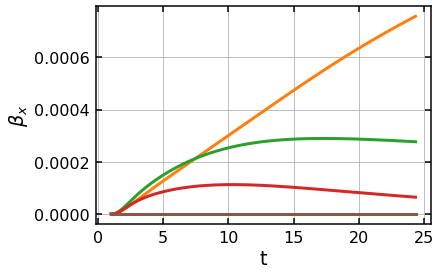

In [13]:
for loc in ['OD', 'midOD', 'cent', 'midUD', 'UD', 'F']:
    plt.plot(fdata['t'], fdata['betax_'+loc], label=loc)
plt.grid()
plt.ylabel(r'$\beta_x$')
plt.xlabel('t')

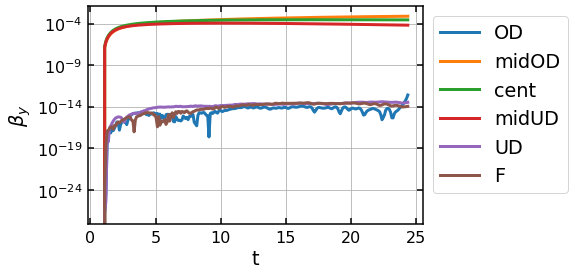

In [19]:
for loc in ['OD', 'midOD', 'cent', 'midUD', 'UD', 'F']:
    plt.semilogy(fdata['t'], abs(fdata['betay_'+loc]), label=loc)
plt.grid()
plt.ylabel(r'$\beta_y$')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))

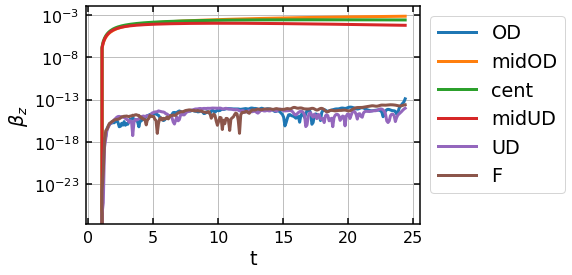

In [18]:
for loc in ['OD', 'midOD', 'cent', 'midUD', 'UD', 'F']:
    plt.semilogy(fdata['t'], abs(fdata['betaz_'+loc]), label=loc)
plt.grid()
plt.ylabel(r'$\beta_z$')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))

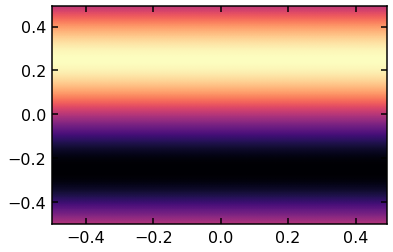

In [23]:
coorcoor = Lin.d1x/param['Lx']
i = int(param['Nx']/4)
plt.pcolormesh(coorcoor, coorcoor, np.sin(2*np.pi*Lin.d3x/param['Lx'])[:,:,i], shading='gouraud')